<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Основная цель - определить рыночную стоимость объектов недвижимости. Построить автоматизированную систему, позволяющую определить анамалии и мошенеческую деятельность.

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м) <br>
**balcony** — число балконов <br>
**ceiling_height** — высота потолков (м) <br>
**cityCenters_nearest** — расстояние до центра города (м) <br>
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия) <br>
**first_day_exposition** — дата публикации <br>
**floor** — этаж <br>
**floors_total** — всего этажей в доме <br>
**is_apartment** — апартаменты (булев тип) <br>
**kitchen_area** — площадь кухни в квадратных метрах (м²) <br>
**last_price** — цена на момент снятия с публикации <br>
**living_area** — жилая площадь в квадратных метрах(м²) <br>
**locality_name** — название населённого пункта <br>
**open_plan** — свободная планировка (булев тип) <br>
**parks_around3000** — число парков в радиусе 3 км <br>
**parks_nearest** — расстояние до ближайшего парка (м) <br>
**ponds_around3000** — число водоёмов в радиусе 3 км <br>
**ponds_nearest** — расстояние до ближайшего водоёма (м) <br>
**rooms** — число комнат <br>
**studio** — квартира-студия (булев тип) <br>
**total_area** — площадь квартиры в квадратных метрах (м²) <br>
**total_images** — число фотографий квартиры в объявлении <br>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проверим какая доля пропущенных значений в каждом столбце:

In [3]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] * 100/ data.shape[0]).round(1)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_apartment,20924,88.3
parks_nearest,15620,65.9
ponds_nearest,14589,61.6
balcony,11519,48.6
ceiling_height,9195,38.8
airports_nearest,5542,23.4
cityCenters_nearest,5519,23.3
ponds_around3000,5518,23.3
parks_around3000,5518,23.3
days_exposition,3181,13.4


Чтобы не поддвергать результаты исследований к искажению, столбцы с пропусками свыше 10 процентов оставим незополненными.
Пустые значения, необходимые для обработки, находятся в столбцах:
is_apartment — апартаменты (булев тип)
ceiling_height — высота потолков (м)
living_area — жилая площадь в квадратных метрах(м²)
kitchen_area — площадь кухни в квадратных метрах (м²)

## Предобработка данных

Заполним пропуски в **is_apartment** значением False. При подаче объявления отмечались лишь аппаратаменты. Для удобста анализа и работы с данными необходимо пустые значения заполнить **False**:

In [4]:
data['is_apartment'].fillna(False, inplace = True)

**Определим долю кухни от общей площади квартиры:**

Создадим столбцы со значением доли кухни и жилой площади от всей площади квартиры:

In [5]:
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']

Заполним пустоты в **living_area** и **kitchen_area**, в которой было принято подавить ошибку:

In [6]:
# цикл для living_area:
for x in data['rooms'].unique():
    data.loc[(data['living_area'].isna())&(data['rooms'] == x), 'living_area'] = \
    data.loc[data['rooms'] == x, 'living_area_part'].median() * data['total_area']

In [7]:
# цикл для kitchen_area:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for x in data['rooms'].unique():
        data.loc[(data['kitchen_area'].isna())&(data['rooms'] == x), 'kitchen_area'] = \
        data.loc[data['rooms'] == x, 'kitchen_area_part'].median() * data['total_area']

Выполним проверку наличия доли пропущенных значений в столбцах:

In [8]:
percent_nan_living_area = data['living_area'].isnull().sum()*100/len(data['living_area'])
print(percent_nan_living_area.round(2),'% - пропусков в столбце living_area')

0.0 % - пропусков в столбце living_area


In [9]:
percent_nan_kitchen_area = data['kitchen_area'].isnull().sum()*100/len(data['kitchen_area'])
print(percent_nan_kitchen_area.round(2),'% - пропусков в столбце kitchen_area')

0.83 % - пропусков в столбце kitchen_area


В **living_area** было 8%, сейчас не содержит пропусков, а в **kitchen_area** было 9.8%, осталась небольшая доля 0.8%, которую можно оставть.

Заменим пропуски в **balcony** на 0, для удобства обработки данных и изменим тип данных:

In [10]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Изменим тип **floor** и **floors_total** для удобства обработки данных:

In [11]:
data['floor'] = data['floor'].fillna(0).astype(int)
data['floors_total'] = data[data['floors_total'].isna() == False]['floors_total'].astype('int')

Заменим тип **last_price** и **living_area** для удобства обработки данных:

In [12]:
data['last_price'] = data['last_price'].astype('int')
data['living_area'] = data['living_area'].astype('int')

Поменяем тип и формат в столбце **first_day_exposition**

In [13]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'],format="%Y-%m-%dT%H:%M:%S")

Наши исходные данные пригодны для последущей обработки. Пустые значения заполнены с учетом минимального влияния на результаты анализа.

## Расчёты и добавление результатов в таблицу

Добавим столбец со стоимостью квадратного метра и изменим его тип, для лучшего восприятия и последующей обработки:

In [14]:
data['price_square_meter'] = data['last_price'] / data['total_area']

In [15]:
data['price_square_meter'] = data['price_square_meter'].astype(int)

Создадим столбец названия дня недели публикации объявления:

In [16]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [17]:
data['weekday_name_exposition'] = data['first_day_exposition'].dt.day_name()

Создадим столбец с названием месяцем публикации объявления:

In [18]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [19]:
data['month_name_exposition'] = data['first_day_exposition'].dt.month_name()

Создадим столбец с годом публикации обьявления:

In [20]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Выполним категоризацию этажа квартиры. Отнесем квартиры с пустм значением **floors_total** к категории **другой**:

In [21]:
# функция для опредления категории
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif (floor != floors_total)&(floor!=1):
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_cat, axis = 1)

Выполним замену букв и приведен данные к нижнему регистру:

In [22]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')

Вывод: Добавлены основные столбцы: стоимость квадратного метра, день недели, месяц и год для каждого объявления. Также произведенена замена буквы "ё" на "е". Эти действия помогут решить поставленную задачу.

## Исследовательский анализ данных

**Гистограмма площади квартир:**

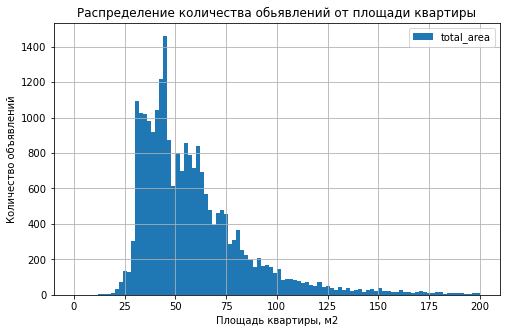

In [23]:
data.plot(kind = 'hist', bins = 100, range=(0,200), figsize = (8,5), y = 'total_area', grid =True)
plt.title('Распределение количества обьявлений от площади квартиры')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Количество объявлений');

**Вывод:** площадь квартиры может варьироваться от 20 до 200 кв.м. Большинство квартир имеют близко к 40 кв.м, график имеет вид близкой к нормальному

**Гистограмма распределения стоимости квартиры:**

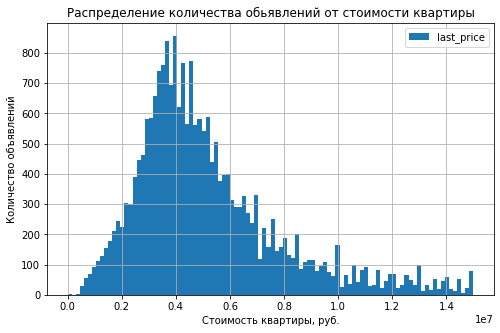

In [24]:
data.plot(kind = 'hist', bins = 100, range=(0,15000000), figsize = (8,5), y = 'last_price', grid =True)
plt.title('Распределение количества обьявлений от стоимости квартиры')
plt.xlabel('Стоимость квартиры, руб.')
plt.ylabel('Количество объявлений');

**Вывод:** стоимость квартиры может изменяться от 50 тыс.руб. до 14 млн.руб. Большинство квартир имеют стоимость 4 млн.руб., график имеет вид близкой к нормальному

**Гистограмма распределения квартир по количеству комнат:**

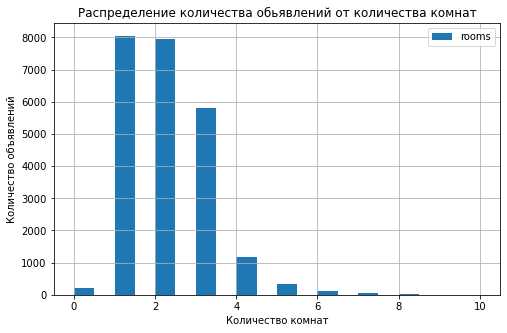

In [25]:
data.plot(kind = 'hist', bins = 20, range=(0,10), figsize = (8,5), y = 'rooms', grid =True)
plt.title('Распределение количества обьявлений от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений');

**Вывод:** большинство квартир составляют однокомнатные.

**Гистограмма распределения квартир по высоте потолков:**

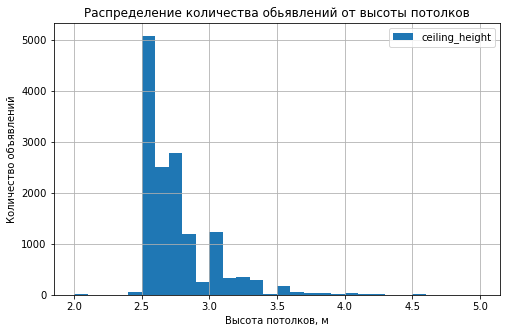

In [26]:
data.plot(kind = 'hist', bins = 30, range=(2,5), figsize = (8,5), y = 'ceiling_height', grid =True)
plt.title('Распределение количества обьявлений от высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений');

**Вывод:** большинство квартир имеют потолки 2.65 м

**Изучим время продажи квартиры.**
Определим среднее и медиану:

In [27]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Более наглядно представим данные на диаграмме размаха

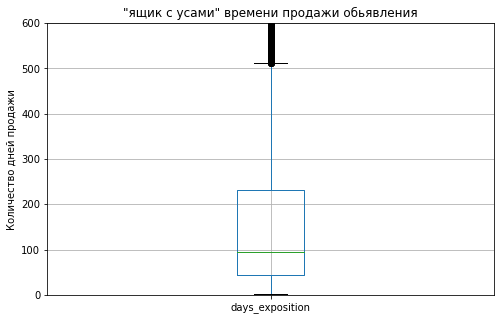

In [28]:
#диаграмма размаха
import matplotlib.pyplot as plt
data.loc[data['days_exposition'] != 0].boxplot('days_exposition', figsize=(8,5))
plt.ylim(0,600)
plt.title('"ящик с усами" времени продажи обьявления')
plt.ylabel('Количество дней продажи');

Числовые значения и визуальное отображение данных показывает, что среднее значение равняется 180 дней, а медиана 95 дней. Также изначально мы видим, что период нормального времени продажи составляет от 0 до 540 дней.

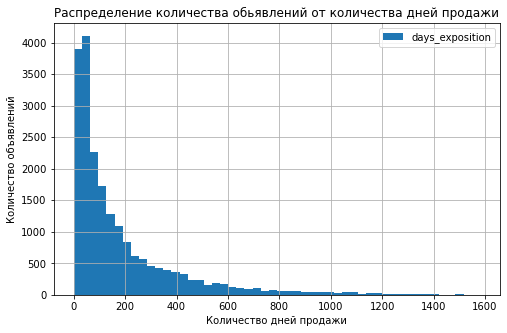

In [29]:
data.plot(kind = 'hist', bins = 50, figsize = (8,5), y = 'days_exposition', grid =True)
plt.title('Распределение количества обьявлений от количества дней продажи')
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество объявлений');

Более детально рассмотри гистограмму с интервалом количества дней продажи от 0 до 200:

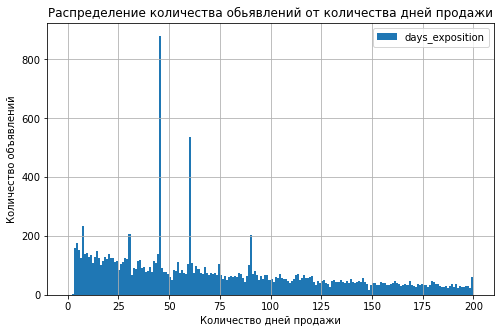

In [30]:
data.plot(kind = 'hist', bins = 200, figsize = (8,5), y = 'days_exposition', grid =True, range=(0,200))
plt.title('Распределение количества обьявлений от количества дней продажи')
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество объявлений');

Определим выбросы, в какие дни происходило массовое снятие обьявления с продажи:

In [31]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

Построив гистограмму(с пределами от 0 до близкое к среднему значению) и с помощью функции **value_counts()**  видим, что выбиваются значения 45, 90. Предполагаю, что эти обьявления автоматически снимаются с продажи.

Произведем IQR фильтрайию строк с выбивающимися значениями и построим "ящик с усами":

In [32]:
Q1 = data['days_exposition'].quantile(0.25)
Q3 = data['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
data_days_exposition = data['days_exposition'].between(Q1, Q3, inclusive=True)
iqr_days_exposition = data.loc[data_days_exposition]

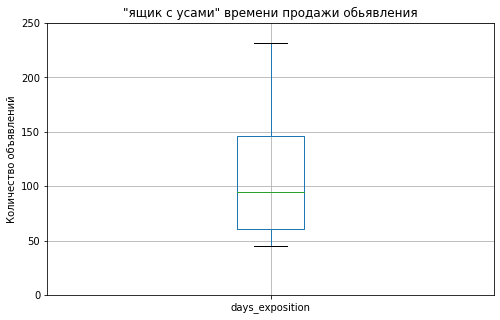

In [33]:
iqr_days_exposition.boxplot('days_exposition', figsize = (8,5))
plt.ylim(0,250)
plt.title('"ящик с усами" времени продажи обьявления')
plt.ylabel('Количество объявлений');

In [34]:
iqr_days_exposition['days_exposition'].describe()

count    10324.000000
mean       108.574777
std         52.692353
min         45.000000
25%         61.000000
50%         95.000000
75%        146.000000
max        232.000000
Name: days_exposition, dtype: float64

**Вывод:** Наши данные после очистки изменились и теперь среднее значение равняется 114 (вместо180), медиана 102(вместо 95), а интервал врмени обычной продажи составил от 45 до 240 дней.

**Изучим зависимость цены квартиры от площади:**

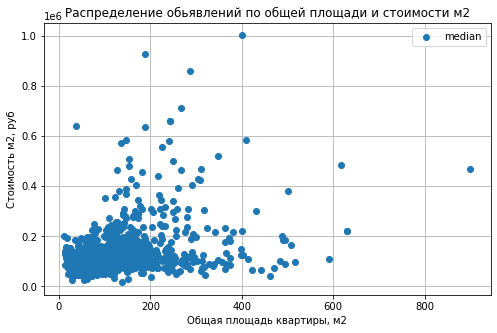

In [35]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_square_meter', aggfunc = ['median'])
pivot_table_total_area.columns = ['median']
pivot_table_total_area.plot(y = 'median', style = 'o', grid=True, figsize=(8,5))
plt.title('Распределение обьявлений по общей площади и стоимости м2')
plt.xlabel('Общая площадь квартиры, м2')
plt.ylabel('Стоимость м2, руб');

In [36]:
data['total_area'].corr(data['price_square_meter'])

0.3019601438779253

**Вывод:** Корреляция составляет 0.3, что говорит о слабой зависимости между двумя величинами. Таким образом, увеличение площади приводит незначительному увеличению стоимости квартиры. 

**Изучим зависимость числа комнат от стоимости:**

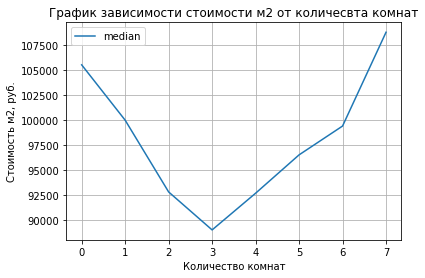

In [37]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['median', 'count'])
pivot_table_rooms.columns = ['median', 'count']
pivot_table_rooms.query('count > 50').plot(y = 'median', grid = True)
plt.title('График зависимости стоимости м2 от количесвта комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость м2, руб.');

In [38]:
data['rooms'].corr(data['price_square_meter'])

0.05541949967059191

**Вывод:** При отображении сводной таблицы видно, что необходимо брать те значения, которые являются обычными. В нашем случае, количество обьявлений больше 50. 
Вывод: корреляция равняется 0.06, что говорит об отсутствии связи между исследуемыми величинами. Также стоит отметить, что трехкомнатные квартиры имееют значительно низкую стомость.

**Изучим стоимость квартиры от расстояния от центра:**

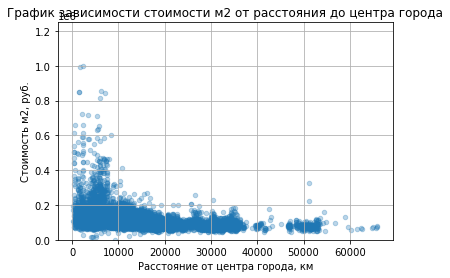

In [39]:
data.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest', alpha = 0.3, ylim =(0,1250000), grid = True)
plt.title('График зависимости стоимости м2 от расстояния до центра города')
plt.xlabel('Расстояние от центра города, км')
plt.ylabel('Стоимость м2, руб.');

In [40]:
data['price_square_meter'].corr(data['cityCenters_nearest'])

-0.317950736828647

**Вывод:** Корреляция отрицательная, что говорит о обратнопропорциональной зависимости цены и расстояния до центра. Низкая зависимость.

**Изучим зависимость между стоимостью квартиры и ее расположением в доме:**

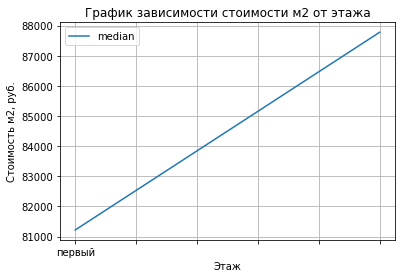

In [41]:
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values ='price_square_meter', aggfunc=['median'])
pivot_table_floor_category.columns = ['median']
pivot_table_floor_category.plot(y = 'median', grid=True)
plt.title('График зависимости стоимости м2 от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость м2, руб.');

**Вывод:** По двум значениям можно сказать, что зависимость имеет линейный характер. Разница между последним и первым этажом составляет 8%. На последнем дороже. Все остальные этажи, находятся в категории "другой" и они располагаются между первым и последним.

**Изучим зависимость между стоимостью квартиры и днем неделеи:**

Создадим словарь обозначения дня недели и его имени:

In [42]:
lib_weekday = data[['weekday_exposition','weekday_name_exposition']].drop_duplicates().sort_values('weekday_exposition').reset_index(drop=True)
lib_weekday.columns = ['обозначение', 'день недели']
lib_weekday

,обозначение,день недели
0,0,Monday
1,1,Tuesday
2,2,Wednesday
3,3,Thursday
4,4,Friday
5,5,Saturday
6,6,Sunday


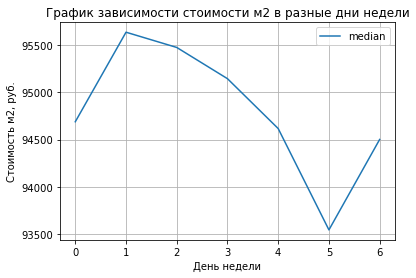

In [43]:
pivot_table_weekday_exposition = data.pivot_table(index='weekday_exposition', values='price_square_meter', aggfunc=['median', 'count'])
pivot_table_weekday_exposition.columns= ['median', 'count']
pivot_table_weekday_exposition.plot(y='median', grid = True)
plt.title('График зависимости стоимости м2 в разные дни недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость м2, руб.');

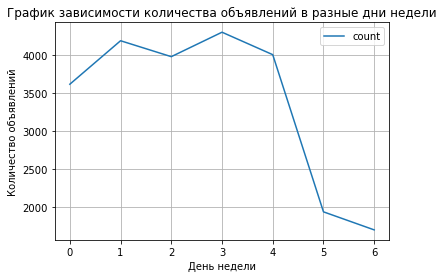

In [44]:
pivot_table_weekday_exposition.plot(y='count', grid = True)
plt.title('График зависимости количества объявлений в разные дни недели')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений');

**Вывод:** Мы видим, что в субботу стоимость ниже, во вторник самая высокая. Предполагаю, это связано с тем, что в будние дни спрос выше, что в свою очередь сваязано с тем, что агенства недвижимости, занимающиеся оформлением всех необходимых документов для покупки жилья, работают как обычно пн-пт. В субботу спрос ниже, что влечет за собой и уменьшение стоимости.

**Изучим зависимость между стоимостью квартиры и месяцем:**

Создадим словарь обозначения месяца и его имени:

In [45]:
lib_weekday = data[['month_exposition','month_name_exposition']].drop_duplicates().sort_values('month_exposition').reset_index(drop=True)
lib_weekday.columns = ['обозначение', 'месяц']
lib_weekday

,обозначение,месяц
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


In [46]:
pivot_table_month_exposition = data.pivot_table(index='month_exposition', values='price_square_meter', aggfunc=['median', 'count'])
pivot_table_month_exposition.columns= ['median', 'count']

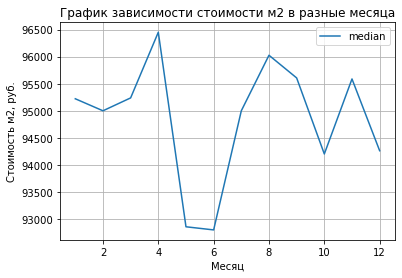

In [47]:
pivot_table_month_exposition.plot(y='median', grid = True)
plt.title('График зависимости стоимости м2 в разные месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость м2, руб.');

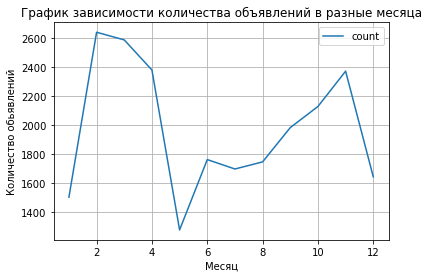

In [48]:
pivot_table_month_exposition.plot(y='count', grid = True)
plt.title('График зависимости количества объявлений в разные месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество обьявлений');

**Вывод:** Наибольшая стоимость находится в апреле месяце, а самая низкая в мае-июне. Скорее всего это связано с сезонностью. поскольку количество продаж имеет такую же зависимость.

**Изучим зависимость между стоимостью квартиры в разные годы:**

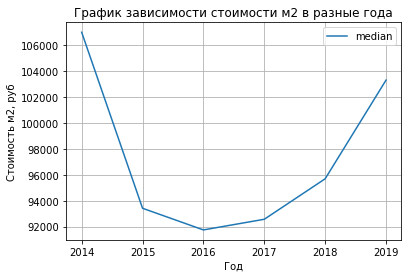

In [49]:
pivot_table_year_exposition = data.pivot_table(index='year_exposition', values='price_square_meter', aggfunc=['median', 'count'])
pivot_table_year_exposition.columns= ['median', 'count']
pivot_table_year_exposition.plot(y='median', grid = True)
plt.title('График зависимости стоимости м2 в разные года')
plt.xlabel('Год')
plt.ylabel('Стоимость м2, руб');

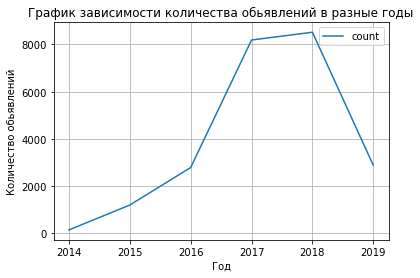

In [50]:
pivot_table_year_exposition.plot(y='count', grid= True)
plt.title('График зависимости количества обьявлений в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество обьявлений');

**Вывод:** В 2016 году стоимость была самой низкой, что повлияло на спрос квартир. После того, как в 2018 году, стоимость квартир начала резко расти, спрос стал падать. 

**Построим таблицу коэффициентов корреляции количественных переменных:**

In [51]:
data_corr = data[['price_square_meter' , 'cityCenters_nearest', 'total_area', 'rooms']]
corrMatrix = data_corr.corr()
corrMatrix

,price_square_meter,cityCenters_nearest,total_area,rooms
price_square_meter,1.000000,-0.317951,0.301960,0.055419
cityCenters_nearest,-0.317951,1.000000,-0.231446,-0.184864
total_area,0.301960,-0.231446,1.000000,0.758344
rooms,0.055419,-0.184864,0.758344,1.000000


**Определим 10 самых дорогих районов:**

In [52]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
locality_pivot_table.round({'count':0, 'mean':1})

,count,mean
locality_name,,
санкт-петербург,15721,114848.6
поселок мурино,556,85681.3
поселок шушары,440,78676.9
всеволожск,398,68654.0
пушкин,369,103125.4
колпино,338,75424.2
поселок парголово,327,90175.5
гатчина,307,68745.7
деревня кудрово,299,92473.1


Самая высокая стоимость:

In [53]:
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231


Самая низкая стоимость:

In [54]:
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
выборг,237,58141.489451


**Определем границу центра города, а также узнаем среднюю цену для каждого километра:**

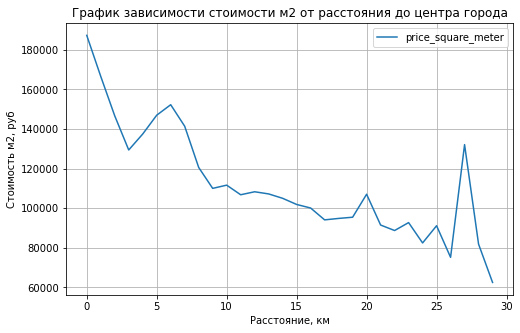

In [55]:
data_cop = data.copy()
data_cop['cityCenters_nearest_km'] = data_cop['cityCenters_nearest']/1000 #перевели в км
data_cop['cityCenters_nearest_km'] = data_cop['cityCenters_nearest_km'].fillna(99999)
data_cop['cityCenters_nearest_km'] = data_cop['cityCenters_nearest_km'].astype('int')
pivot_table_km = data_cop.query('locality_name == "санкт-петербург" and cityCenters_nearest_km !=99999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km.plot(figsize=(8,5), grid=True)
plt.title('График зависимости стоимости м2 от расстояния до центра города')
plt.xlabel('Расстояние, км')
plt.ylabel('Стоимость м2, руб');

**Вывод:** Если наблюдать от начала, то систематическое падение начинается на расстояние 7 км, вторую точку на расстоянии 26 км, которую можно относетки к границе - окраина.

**Анализ центральной части города:**

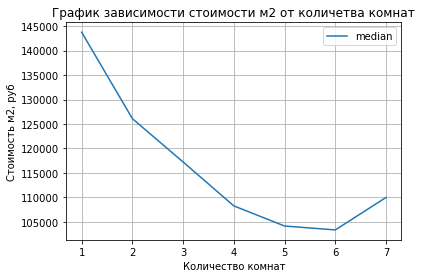

In [56]:
spb_centre = data_cop.query('cityCenters_nearest_km < 7 and locality_name == "санкт-петербург"')
pivot_table_spb_centre = spb_centre.pivot_table(index='rooms', values='price_square_meter', aggfunc=['count', 'mean', 'median'])
pivot_table_spb_centre.columns = ['count', 'mean', 'median']
pivot_table_spb_centre.query('count > 20').plot(y='median', grid= True)
plt.title('График зависимости стоимости м2 от количетва комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость м2, руб');

Корреляция зависимости стоимрсти квартиры и количества комнат в ней:

In [57]:
spb_centre['rooms'].corr(spb_centre['price_square_meter'])

-0.00983939872996214

**Вывод:** в центре Санкт-Петербурга, чем меньше количество комнат, тем выше стоимость квадратного метра. Одна корреляция показывает, что зависимости нет. Странно.

**Определим, зависимость стоимости квадратного метра от этажа:**

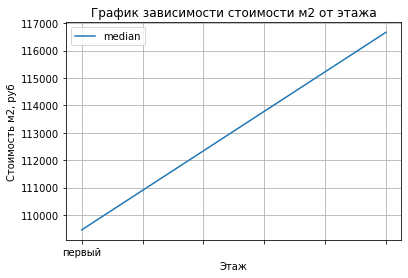

In [58]:
pivot_table_spb_centre_floors = spb_centre.query('floor_category != "другой"') \
.pivot_table(index='floor_category', values ='price_square_meter', aggfunc=['count', 'mean', 'median'])

pivot_table_spb_centre_floors.columns =['count', 'mean', 'median']
pivot_table_spb_centre_floors.plot(y='median', grid=True)
plt.title('График зависимости стоимости м2 от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость м2, руб');

**Вывод:** в центре Петербурга нет отличий от всего города.

**Проанализируем стоимость квартиры от расстояния до центра:**

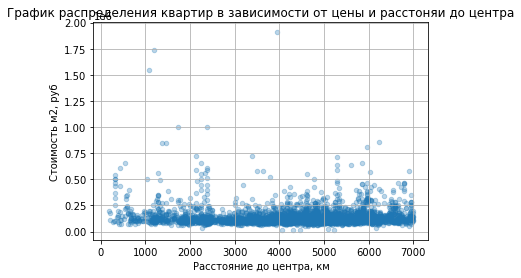

In [59]:
spb_centre.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest', alpha = 0.3, grid = True)
plt.title('График распределения квартир в зависимости от цены и расстоняи до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость м2, руб');

In [60]:
spb_centre['price_square_meter'].corr(spb_centre['cityCenters_nearest'])

-0.029526751607416715

**Вывод:** график и значение корреляции говорит, что связи между расстоянием от центра и стоимостью квадратного метра нет. 

**Проанализируем стоимость квартиры от дня недели продажи:**

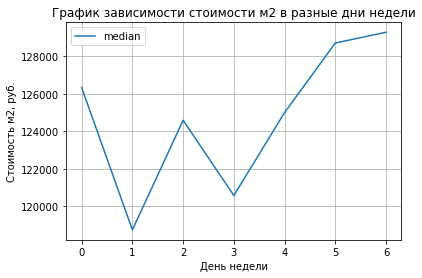

In [61]:
pivot_table_spb_centre_weekday = spb_centre.pivot_table(index='weekday_exposition', values ='price_square_meter', aggfunc='median')
pivot_table_spb_centre_weekday.columns=['median']
pivot_table_spb_centre_weekday.plot(grid=True)
plt.title('График зависимости стоимости м2 в разные дни недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость м2, руб.');

**Вывод:** Ситуация для центра Санкт-Петербурга отличается от всей выборки. Самые высокие цены в субботу и воскресенье, а самые низкие цены в понедельник, что, скорее всего связано с началом рабочей недели.

**Проанализируем стоимость квартиры от месяца продажи:**

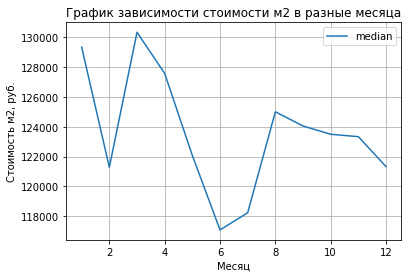

In [62]:
pivot_table_spb_centre_month = spb_centre.pivot_table(index='month_exposition', values ='price_square_meter', aggfunc='median')
pivot_table_spb_centre_month.columns=['median']
pivot_table_spb_centre_month.plot(grid=True)
plt.title('График зависимости стоимости м2 в разные месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость м2, руб.');

**Вывод:** ситуация похожа с общей выборкой. В апреле самая высокая цена за квадратный метр, а в июне - самая низкая.

**Проанализируем стоимость квартиры от года продажи:**

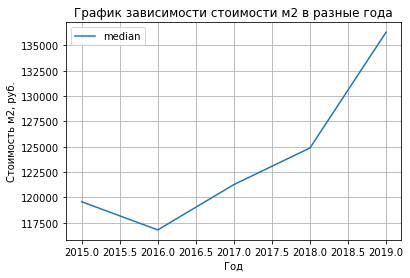

In [63]:
pivot_table_spb_centre_year = spb_centre.pivot_table(index='year_exposition', values ='price_square_meter', aggfunc=['median', 'count'])
pivot_table_spb_centre_year.columns= ['median', 'count']
pivot_table_spb_centre_year.query('count > 50').plot(y='median', grid=True)
plt.title('График зависимости стоимости м2 в разные года')
plt.xlabel('Год')
plt.ylabel('Стоимость м2, руб.');

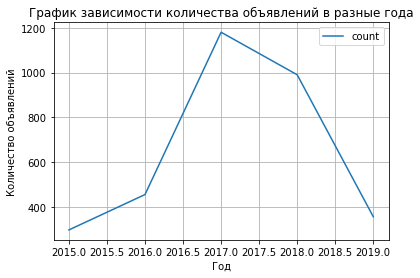

In [64]:
pivot_table_spb_centre_year.query('count > 50').plot(y='count', grid=True)
plt.title('График зависимости количества объявлений в разные года')
plt.xlabel('Год')
plt.ylabel('Количество объявлений');

**Вывод:** видим, что цена с каждым годом увеличивается, а вот ситуация с количеством продаж имеет экстремум в 2017 году. Интересно, с чем это связано.

In [65]:
data_corr_spb = spb_centre[['price_square_meter' , 'cityCenters_nearest', 'total_area', 'rooms']]
corrMatrix_spb = data_corr_spb.corr()
corrMatrix_spb

,price_square_meter,cityCenters_nearest,total_area,rooms
price_square_meter,1.000000,-0.029527,0.235522,-0.009839
cityCenters_nearest,-0.029527,1.000000,-0.072645,-0.157323
total_area,0.235522,-0.072645,1.000000,0.727687
rooms,-0.009839,-0.157323,0.727687,1.000000


## Общий вывод

1. Полученные мною данные были подвержены обработке: заполнены пустые значения в необходимых местах, изменен тип данных для дальнейшего анализа.
2. Добавлены новые значения: цена квадратного метра, день недели, месяц и год публикации обьявления о продаже, классификация расположения квартиры на этаже: первый, последний, другой, а также добавлены соотношение жилой и общей площади, и отношение площади кухни к общей.
3. Определили, что выбиваются значения 45, 90 дней со дня публикации обьявления. Предполагаю, что эти обьявления автоматически снимаются с продажи. данные значения были иссключены из дальнейшего исслдеования. Определили, что нормальное время продажи является от 45 до 240 дней. Факторы, влияющие на стоимость квадратного метра являются: этаж, расстояние до центра города. Также стоит отметить, что трехкомнатные квартиры имееют самую низкую стоимость за квадратный метр. 
4. В субботу стоимость квадратного метра ниже всего, во вторник самая высокая. Предполагаю, это связано с тем, что в будние дни спрос выше, что в свою очередь сваязано, что агенства недвижимости, занимающиеся оформлением всех необходимых документов для покупки жилья, работают как обычно пн-пт. Хотя, рассматривая сегмент - центр СПб, мы получили, что самые низкие цены в понедельник, а самые высокие цены в воскресенье. 
 5. В 2016 году стоимость была самой низкой, что повлияло на спрос квартир. После того, как в 2018 году, стоимость квартир начала резко расти, спрос стал падать. Однако цены в центре СПб с каждым годом имеют тенденцию роста, хотя спрос в 2017 года начал резко падать.
 
Рекомендация: средняя цена за квадратный метр составляет 90-95 тыс.руб. Большинство квартир составляют однокомнатные. Граница начала центра города заканчивается на расстоянии 7 км от центра. При выборе квартиры в центральной части стоимость жилья поднимется до 150 тыс.руб. за квадратный метр. Также стоимость изменяется в зависимости от этажа, чем выше, тем дороже. Это условие расспространяется на всей территории СПб. Самый низский случай по ценовому параметру получим в воскресенье мая или июня, а самый дорогой по средине недели в апреле месяца. В центральной части СПб самый дорогой случай будет в выходные дни апреля, а самый дешевый случай в понедельник летнего периода. 